In [ ]:
## Librerias y carga de datos

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import cross_val_score
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
import ipywidgets as widgets

df = pd.read_csv('/content/dataset.csv')

In [ ]:
## Acomodo de columnas

cols = [i for i in df.iloc[:,1:].columns]
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## Se cambian las columnas de forma en que cada columna sea un sintoma independiente

tmp = pd.melt(df.reset_index() ,id_vars = ['index'], value_vars = cols )
tmp['add1'] = 1
tmp.head()

# Pivot table
diseases = pd.pivot_table(tmp, 
                          values = 'add1',
                          index = 'index',
                          columns = 'value')

# Add disease column
diseases.insert(0,'disease',df['Disease'])

# Fill NaN with zero
diseases = diseases.fillna(0)
diseases.head()

value,disease,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
index,,,,,,,,,,,,,,,,,,,,,
0,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
diseases.shape

(4920, 132)

In [ ]:
## Se generan las frecuencias de cada sintoma en todo el dataset

diseases = diseases.iloc[:, 1:]
diseases = diseases.astype(int)
frecuencias = diseases.sum().sort_values(ascending=False)
print(frecuencias)

value
 fatigue                1932
 vomiting               1914
 high_fever             1362
 loss_of_appetite       1152
 nausea                 1146
                        ... 
 muscle_wasting          108
 blackheads              108
 sunken_eyes             108
 pus_filled_pimples      108
 foul_smell_of urine     102
Length: 131, dtype: int64


In [ ]:
## Se hace lo mismo pero con la lista completa

pd.options.display.max_rows = None
frecuencias = diseases.sum().sort_values(ascending=False)
print(frecuencias)

value
 fatigue                           1932
 vomiting                          1914
 high_fever                        1362
 loss_of_appetite                  1152
 nausea                            1146
 headache                          1134
 abdominal_pain                    1032
 yellowish_skin                     912
 yellowing_of_eyes                  816
 chills                             798
 skin_rash                          786
 malaise                            702
 chest_pain                         696
 joint_pain                         684
 sweating                           678
itching                             678
 dark_urine                         570
 diarrhoea                          564
 cough                              564
 irritability                       474
 muscle_pain                        474
 excessive_hunger                   462
 lethargy                           456
 weight_loss                        456
 breathlessness                   

In [ ]:
## Cantidad total de sintomas

suma_total = frecuencias.sum()
print(suma_total)

36648


In [ ]:
## Se genera el porcentaje de frecuencia de cada sintoma en relacion al total de los sintomas

frecuencias = diseases.sum().sort_values(ascending=False)
suma_total = frecuencias.sum()
frecuencias_porcentaje = frecuencias / suma_total * 100
print(frecuencias_porcentaje)

value
 fatigue                           5.271775
 vomiting                          5.222659
 high_fever                        3.716437
 loss_of_appetite                  3.143418
 nausea                            3.127046
 headache                          3.094303
 abdominal_pain                    2.815979
 yellowish_skin                    2.488540
 yellowing_of_eyes                 2.226588
 chills                            2.177472
 skin_rash                         2.144728
 malaise                           1.915521
 chest_pain                        1.899149
 joint_pain                        1.866405
 sweating                          1.850033
itching                            1.850033
 dark_urine                        1.555337
 diarrhoea                         1.538965
 cough                             1.538965
 irritability                      1.293386
 muscle_pain                       1.293386
 excessive_hunger                  1.260642
 lethargy                 

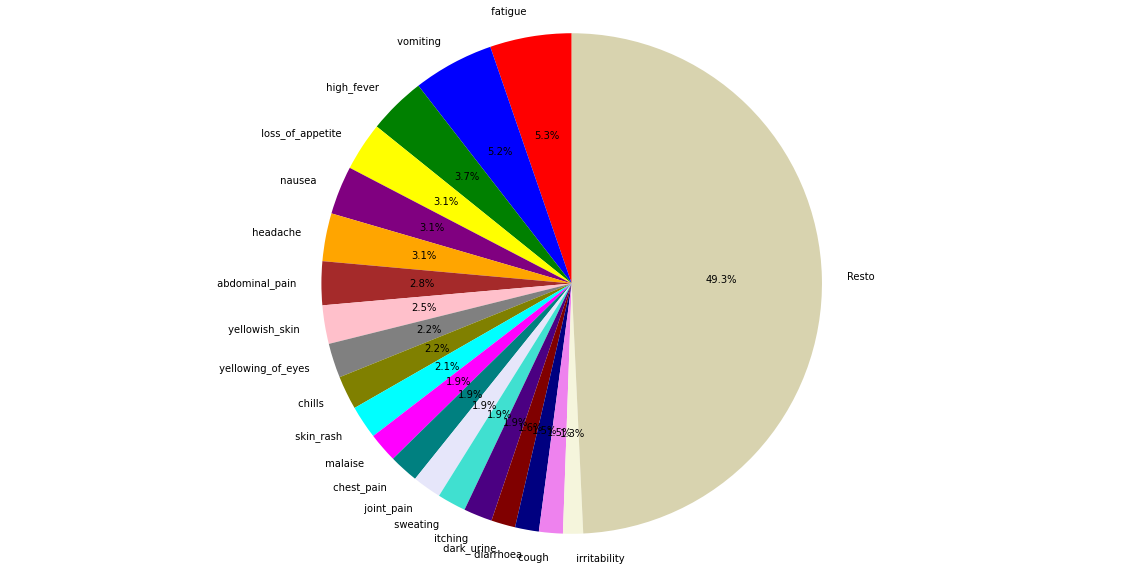

In [ ]:
## Se grafica los 20 sintomas mas frecuentas en relacion con el total

top_20 = frecuencias[:20]
resto = frecuencias[20:]

resto_sum = resto.sum()

labels = list(top_20.index) + ['Resto']
sizes = list(top_20) + [resto_sum]

colors = colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'brown', 'pink', 'grey', 'olive', 'cyan', 'magenta', 'teal', 'lavender', 'turquoise', 'indigo', 'maroon', 'navy', 'violet', 'beige', '#D8D3AF']

fig1, ax1 = plt.subplots(figsize=(16,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [ ]:
print(top_20.index)

Index([' fatigue', ' vomiting', ' high_fever', ' loss_of_appetite', ' nausea',
       ' headache', ' abdominal_pain', ' yellowish_skin', ' yellowing_of_eyes',
       ' chills', ' skin_rash', ' malaise', ' chest_pain', ' joint_pain',
       ' sweating', 'itching', ' dark_urine', ' diarrhoea', ' cough',
       ' irritability'],
      dtype='object', name='value')


In [ ]:
## Se cambian las columnas de forma en que cada columna sea un sintoma independiente

tmp = pd.melt(df.reset_index() ,id_vars = ['index'], value_vars = cols )
tmp['add1'] = 1
tmp.head()

# Pivot table
diseases = pd.pivot_table(tmp, 
                          values = 'add1',
                          index = 'index',
                          columns = 'value')

# Add labels column
diseases.insert(0,'disease',df['Disease'])

# Fill NaN with zero
diseases = diseases.fillna(0)
diseases.head()

value,disease,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
index,,,,,,,,,,,,,,,,,,,,,
0,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
frecuencias = diseases.sum(axis=0)
top_20 = frecuencias[1:].sort_values(ascending=False)[:20]
top_20_columns = list(top_20.index)
dftop20 = diseases.loc[:, top_20_columns]
dftop20.insert(0, 'disease', df['Disease'])
dftop20.head()

value,disease,fatigue,vomiting,high_fever,loss_of_appetite,nausea,headache,abdominal_pain,yellowish_skin,yellowing_of_eyes,...,skin_rash,malaise,chest_pain,joint_pain,sweating,itching,dark_urine,diarrhoea,cough,irritability
index,,,,,,,,,,,,,,,,,,,,,
0,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
print(dftop20.columns)

Index(['disease', ' fatigue', ' vomiting', ' high_fever', ' loss_of_appetite',
       ' nausea', ' headache', ' abdominal_pain', ' yellowish_skin',
       ' yellowing_of_eyes', ' chills', ' skin_rash', ' malaise',
       ' chest_pain', ' joint_pain', ' sweating', 'itching', ' dark_urine',
       ' diarrhoea', ' cough', ' irritability'],
      dtype='object', name='value')


In [ ]:
dftop20.shape

(4920, 21)

In [ ]:
dftop20_copy = dftop20.copy()
dftop20_copy['NumSymptoms'] = dftop20_copy.iloc[:,1:].sum(axis=1)
symptom_counts = dftop20_copy.groupby('NumSymptoms').size().reset_index(name='counts')
print(symptom_counts)

    NumSymptoms  counts
0           0.0     522
1           1.0     846
2           2.0    1056
3           3.0     594
4           4.0     138
5           5.0     114
6           6.0     330
7           7.0     546
8           8.0     276
9           9.0     258
10         10.0     240


In [ ]:
# Seleccionar solo la columna de enfermedad y la columna NumSymptoms
df_disease_symptoms = dftop20_copy[['disease', 'NumSymptoms']]

# Filtrar las filas donde NumSymptoms es cero
diseases_without_symptoms = df_disease_symptoms[df_disease_symptoms['NumSymptoms'] == 0]

# Contar la frecuencia de aparición de cada enfermedad sin síntomas
diseases_without_symptoms_count = diseases_without_symptoms.groupby('disease').size().reset_index(name='counts')

# Imprimir la lista de enfermedades y su frecuencia de aparición
print(diseases_without_symptoms_count)

                        disease  counts
0                          AIDS       6
1                          Acne       6
2                       Allergy      12
3                     Arthritis     120
4          Cervical spondylosis     120
5                     Diabetes        6
6  Dimorphic hemmorhoids(piles)     120
7               Osteoarthristis       6
8       Urinary tract infection     120
9                Varicose veins       6


In [ ]:
#Eliminamos los que tienen 0 o 1 sintoma
dftop20_copy = dftop20_copy[dftop20_copy['NumSymptoms'] > 1]
dftop20_copy.shape

(3552, 22)

In [ ]:
dftop20_copy = dftop20_copy.drop('NumSymptoms', axis=1)

In [ ]:
enfermedades_conteo = dftop20_copy['disease'].value_counts()
print(enfermedades_conteo)

hepatitis A                                120
Hypoglycemia                               120
Heart attack                               120
Pneumonia                                  120
Common Cold                                120
Tuberculosis                               120
Alcoholic hepatitis                        120
Hepatitis E                                120
Hepatitis D                                120
Hepatitis C                                120
Hepatitis B                                120
GERD                                       120
Typhoid                                    120
Dengue                                     120
Chicken pox                                120
Malaria                                    120
Jaundice                                   120
(vertigo) Paroymsal  Positional Vertigo    120
Bronchial Asthma                           120
Peptic ulcer diseae                        120
Chronic cholestasis                        120
Hyperthyroidi

In [ ]:
dftop20_copy.head()

value,disease,fatigue,vomiting,high_fever,loss_of_appetite,nausea,headache,abdominal_pain,yellowish_skin,yellowing_of_eyes,...,skin_rash,malaise,chest_pain,joint_pain,sweating,itching,dark_urine,diarrhoea,cough,irritability
index,,,,,,,,,,,,,,,,,,,,,
0,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
data = dftop20_copy

In [ ]:
# Separación de la variable objetivo y las variables predictoras
X = data.drop('disease', axis=1)
y = data['disease']

# Separación del conjunto de entrenamiento y el conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creación del modelo y ajuste con los datos de entrenamiento
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Medición de la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Exactitud del modelo: {:.2f}%'.format(accuracy*100))


Exactitud del modelo: 51.90%


In [ ]:
# Definir una lista de valores ccp_alpha para explorar
ccp_alphas = np.arange(0.0, 1.0, 0.005)

# Crear una lista para almacenar los resultados de precisión para cada valor ccp_alpha
cv_scores = []

# Realizar validación cruzada con 5 divisiones para cada valor ccp_alpha
for alpha in ccp_alphas:
    model = DecisionTreeClassifier(max_depth=5, ccp_alpha=alpha)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))

# Encontrar el valor ccp_alpha que maximiza la precisión
optimal_alpha = ccp_alphas[np.argmax(cv_scores)]
print("Optimal alpha: {:.4f}".format(optimal_alpha))


Optimal alpha: 0.0000


In [ ]:
# Definir la cuadrícula de hiperparámetros a explorar
param_dist = {
    "criterion": ["gini", "entropy"],
    "max_features": uniform(0.0, 1.0),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 20),
    "max_depth": [5]
}

# Crear un objeto RandomizedSearchCV
model = DecisionTreeClassifier(random_state=42)
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=100, cv=5, random_state=42
)

# Ajustar el modelo con los datos de entrenamiento
random_search.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = random_search.predict(X_test)

# Obtener los mejores hiperparámetros
best_params = random_search.best_params_
print(f"Los mejores hiperparámetros son: {best_params}")

# Medición de la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Exactitud del modelo: {:.2f}%'.format(accuracy*100))

Los mejores hiperparámetros son: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 0.8870864242651173, 'min_samples_leaf': 1, 'min_samples_split': 12}
Exactitud del modelo: 79.75%


In [ ]:
# Crear un modelo de Random Forest con 100 árboles
modelrf = RandomForestClassifier(n_estimators=5, criterion='entropy', max_depth=5, max_features=0.8870864242651173, min_samples_leaf=1, min_samples_split=12, random_state=42)

# Ajustar el modelo con los datos de entrenamiento
modelrf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelrf.predict(X_test)

# Medir la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Precisión del modelo:', accuracy)

Precisión del modelo: 0.9170182841068917


In [ ]:
# Crear las casillas de verificación
checkboxes = [
    widgets.Checkbox(description='Fatiga', value=bool(data[' fatigue'].values[0])),
    widgets.Checkbox(description='Vómito', value=bool(data[' vomiting'].values[0])),
    widgets.Checkbox(description='Fiebre alta', value=bool(data[' high_fever'].values[0])),
    widgets.Checkbox(description='Pérdida de apetito', value=bool(data[' loss_of_appetite'].values[0])),
    widgets.Checkbox(description='Náuseas', value=bool(data[' nausea'].values[0])),
    widgets.Checkbox(description='Dolor de cabeza', value=bool(data[' headache'].values[0])),
    widgets.Checkbox(description='Dolor abdominal', value=bool(data[' abdominal_pain'].values[0])),
    widgets.Checkbox(description='Piel amarillenta', value=bool(data[' yellowish_skin'].values[0])),
    widgets.Checkbox(description='Ojos amarillentos', value=bool(data[' yellowing_of_eyes'].values[0])),
    widgets.Checkbox(description='Escalofríos', value=bool(data[' chills'].values[0])),
    widgets.Checkbox(description='Erupción en la piel', value=bool(data[' skin_rash'].values[0])),
    widgets.Checkbox(description='Malestar general', value=bool(data[' malaise'].values[0])),
    widgets.Checkbox(description='Dolor en el pecho', value=bool(data[' chest_pain'].values[0])),
    widgets.Checkbox(description='Dolor en las articulaciones', value=bool(data[' joint_pain'].values[0])),
    widgets.Checkbox(description='Sudoración', value=bool(data[' sweating'].values[0])),
    widgets.Checkbox(description='Picazón en la piel', value=bool(data['itching'].values[0])),
    widgets.Checkbox(description='Orina oscura', value=bool(data[' dark_urine'].values[0])),
    widgets.Checkbox(description='Diarrea', value=bool(data[' diarrhoea'].values[0])),
    widgets.Checkbox(description='Tos', value=bool(data[' cough'].values[0])),
    widgets.Checkbox(description='Irritabilidad', value=bool(data[' irritability'].values[0]))
]

# Crear un botón para realizar la predicción
button = widgets.Button(description='Realizar predicción')

# Crear una función para realizar la predicción
def predecir_enfermedad(b):
    sintomas_paciente = [int(c.value) for c in checkboxes]
    enfermedad_predicha = modelrf.predict([sintomas_paciente])
    print('La enfermedad predicha para el paciente es:', enfermedad_predicha[0])

# Asignar la función al botón
button.on_click(predecir_enfermedad)

# Mostrar las casillas de verificación y el botón
display(*checkboxes, button)

Checkbox(value=False, description='Fatiga')

Checkbox(value=False, description='Vómito')

Checkbox(value=False, description='Fiebre alta')

Checkbox(value=False, description='Pérdida de apetito')

Checkbox(value=False, description='Náuseas')

Checkbox(value=False, description='Dolor de cabeza')

Checkbox(value=False, description='Dolor abdominal')

Checkbox(value=False, description='Piel amarillenta')

Checkbox(value=False, description='Ojos amarillentos')

Checkbox(value=False, description='Escalofríos')

Checkbox(value=True, description='Erupción en la piel')

Checkbox(value=False, description='Malestar general')

Checkbox(value=False, description='Dolor en el pecho')

Checkbox(value=False, description='Dolor en las articulaciones')

Checkbox(value=False, description='Sudoración')

Checkbox(value=True, description='Picazón en la piel')

Checkbox(value=False, description='Orina oscura')

Checkbox(value=False, description='Diarrea')

Checkbox(value=False, description='Tos')

Checkbox(value=False, description='Irritabilidad')

Button(description='Realizar predicción', style=ButtonStyle())

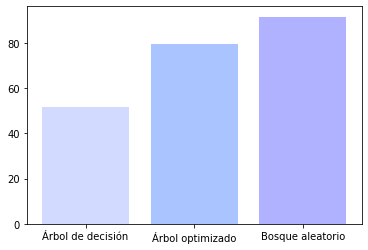

In [ ]:
modelosgf = ['Árbol de decisión', 'Árbol optimizado', 'Bosque aleatorio']
exactitudgf = [51.90, 79.75, 91.70]
coloresgf = [(210/255, 218/255, 255/255), (170/255, 196/255, 255/255), (177/255, 178/255, 255/255)]

plt.bar(modelosgf, exactitudgf, color=coloresgf)
plt.show()